# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [89]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [92]:
print(len(x_train), len(y_train), len(x_test), len(y_test))


404 404 102 102


## Apply your model to the train set

#### Importing and initializing the model class

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
linreg = LinearRegression()

#### Fitting the model to the train data

In [95]:
result = linreg.fit(x_train, y_train)

In [96]:
result.coef_

array([ 2.33506328,  3.30878875, -6.32515701,  5.17410746, -6.27292772])

#### Calculating predictions on the train set, and on the test set

In [97]:
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

#### Calculating your residuals

In [98]:
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
mean_squared_error(y_train, y_hat_train)

22.28795974622455

In [101]:
mean_squared_error(y_test, y_hat_test)

19.6289736636091

If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [102]:
training_error = []
testing_error = []
training_size = []
for i in np.linspace(0.2,0.9,50):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = i)
    training_size.append(len(x_train))
    linreg = LinearRegression()
    result = linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    y_hat_test = linreg.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_hat_train))
    testing_error.append(mean_squared_error(y_test, y_hat_test))
    print(f'when test size is {i}')
    print(f'train MSR is {mean_squared_error(y_train, y_hat_train)}')
    print(f'test MSR is {mean_squared_error(y_test, y_hat_test)}')
    print('--------------')
    

when test size is 0.2
train MSR is 23.010450306433796
test MSR is 16.70790815320004
--------------
when test size is 0.2142857142857143
train MSR is 21.84660924962656
test MSR is 22.477951477887284
--------------
when test size is 0.2285714285714286
train MSR is 22.76740286443656
test MSR is 19.113256504560944
--------------
when test size is 0.24285714285714288
train MSR is 20.638214401037683
test MSR is 25.224509317644035
--------------
when test size is 0.2571428571428572
train MSR is 21.937600661866167
test MSR is 21.746929219300412
--------------
when test size is 0.27142857142857146
train MSR is 20.851018691167827
test MSR is 24.57915399941102
--------------
when test size is 0.2857142857142857
train MSR is 25.446787009194708
test MSR is 12.615127400321727
--------------
when test size is 0.3
train MSR is 21.077741359570485
test MSR is 23.99124148208667
--------------
when test size is 0.3142857142857143
train MSR is 19.448401875992634
test MSR is 27.594295305930093
-------------

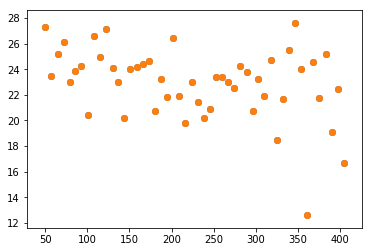

In [104]:
import matplotlib.pyplot as plt
plt.scatter(training_size, testing_error)
plt.scatter(training_size, testing_error)

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

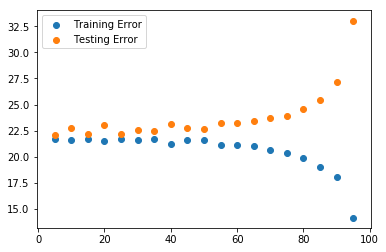

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.